# Lab 1 | Cleaning numerical data

## Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

1. Import the necessary libraries.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [84]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [85]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [86]:
customer_df.shape

(9134, 24)

In [87]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case).

In [88]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [89]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [90]:
customer_df = customer_df.rename(columns = {'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [91]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

6. Check NaN values per column.

In [92]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that differentiates between continuous and discrete variables (Hint: A number of unique values might be useful). 
Store continuous data into a continuous variable and do the same for discrete and categorical.

In [93]:
def funk(df):
    categoricals = df.select_dtypes('object')
    discrete = df.select_dtypes('int64')
    continuous = df.select_dtypes('float64')
    return categoricals, discrete, continuous
categoricals, discrete, continuous = funk(customer_df)

8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [94]:
for col in customer_df.select_dtypes('object'):
    print(customer_df[col].value_counts(), '\n')

XI56955    1
MM49431    1
MJ54807    1
KI17749    1
MU79385    1
          ..
RX93631    1
YI28422    1
QL93655    1
JP69867    1
XM69101    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

P

9. Get categorical features.

In [95]:
categoricals

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


10. What should we do with the customer_id column?

In [96]:
# Customer is just a label, it doesn't store other information.
customer_df = customer_df.set_index('customer', drop=True)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Lab 2 | Cleaning categorical data

1. Import the necessary libraries if you are starting a new notebook.

In [97]:
# Done

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [98]:
continuous_df = customer_df.select_dtypes('float64')

In [99]:
discrete_df = customer_df.select_dtypes('int64')

3. Plot a correlation matrix, what can you see?

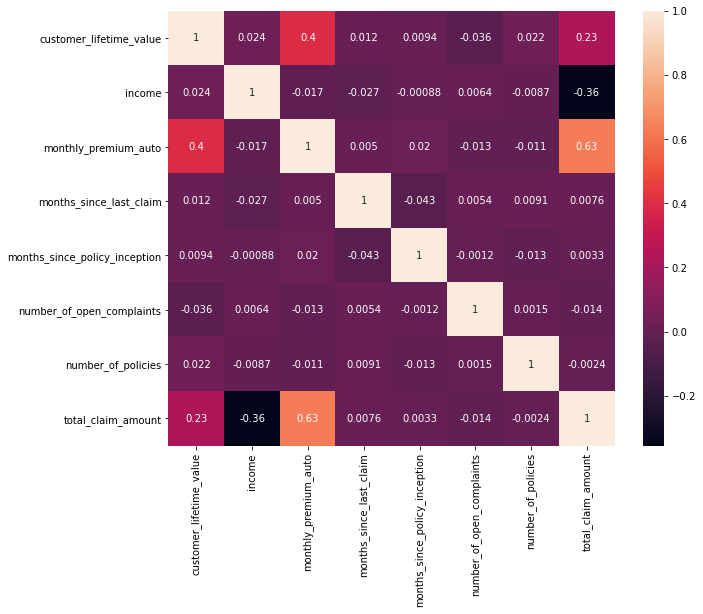

In [100]:
corr_matrix = customer_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Only one pair of parameters are clearly correlated with each other, namely: 
- monthly_premium_auto with total_claim_amount (0.63)
Two other pair of parameters are correlated with each other:
- monthly_premium_auto with customer_lifetime_value (0.4)
- total_claim_amount with customer_lifetime_value (0.23) 

Besides, total_claim_amount and income have slightly negative correlated between each other (-0.36).

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

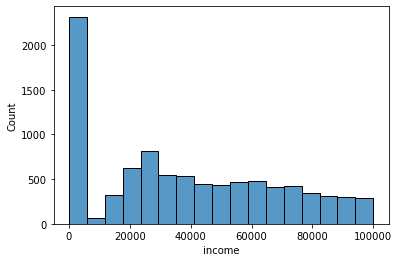

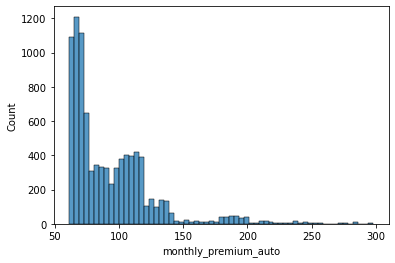

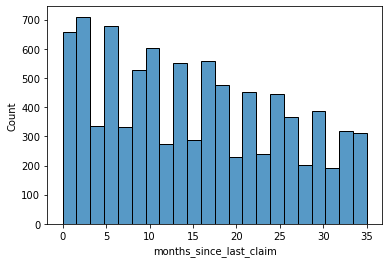

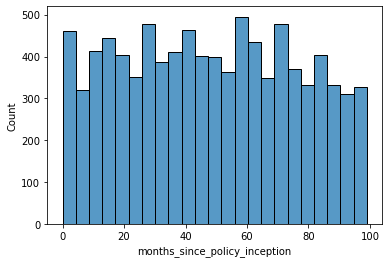

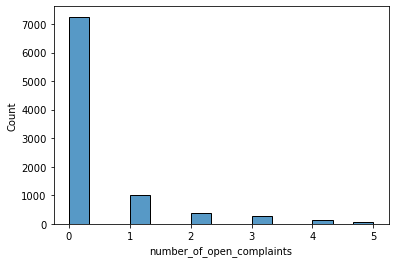

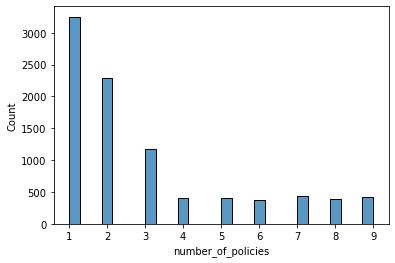

In [101]:
for col in discrete_df.columns:
    sns.histplot(customer_df[col])
    plt.show()

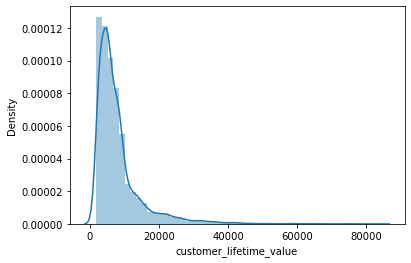

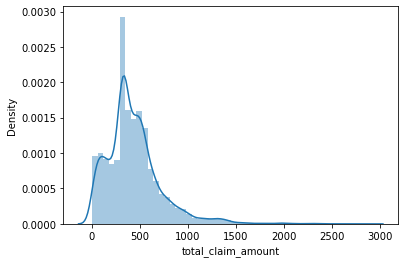

In [102]:
for col in continuous.columns:
    sns.distplot(customer_df[col])
    plt.show()

5. What can you see in the plots?
- Some of the features must be ingeneered: for example, 'income' can't be zero for such a large proportion of customers. Most probably, the information hasn't been collected.

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

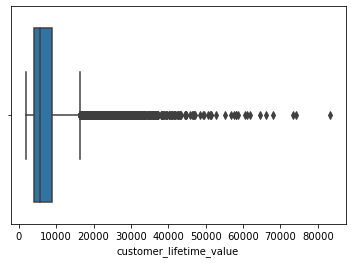

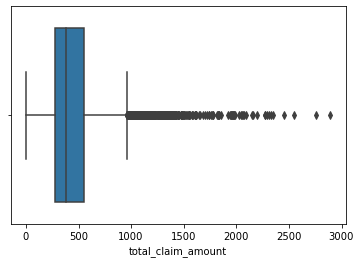

In [103]:
for col in continuous.columns:
    sns.boxplot(customer_df[col])
    plt.show()

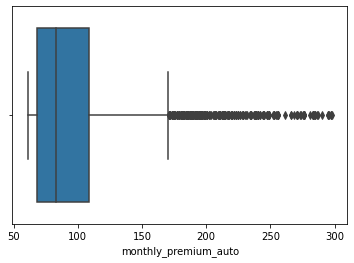

In [104]:
#Despite being integers, we can't really say that this column correspond to discrete values:
sns.boxplot(customer_df['monthly_premium_auto'])
plt.show()

7. Have you found outliers? If you have, what should we do with them?
- Eventually we'll drop them if necessary, after checking our benchmark model with unprocessed data

8. Check nan values per column.
- See above question 6 of the first part.

9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
 - See question 7 of the first part.

10. Get categorical features.

In [105]:
categoricals.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


11. What should we do with the customer id column?
- Remove it from the features and set it to the index, since they are just a label (already done in previous lab) 

In [106]:
categoricals = categoricals.set_index('customer', drop = True)
categoricals.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

1. Open the categoricals variable we created before.


In [107]:
categoricals.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

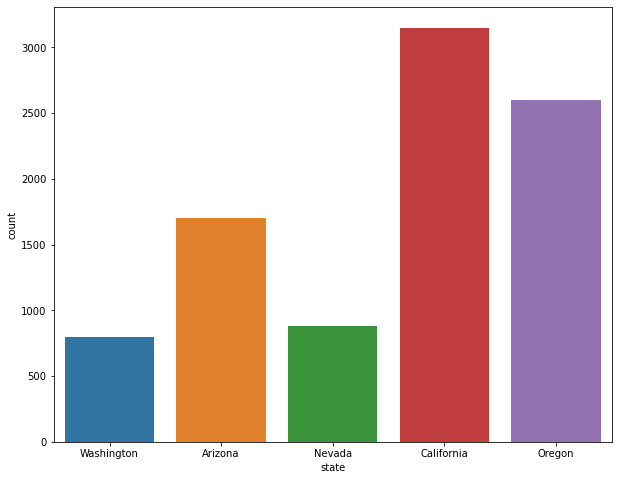

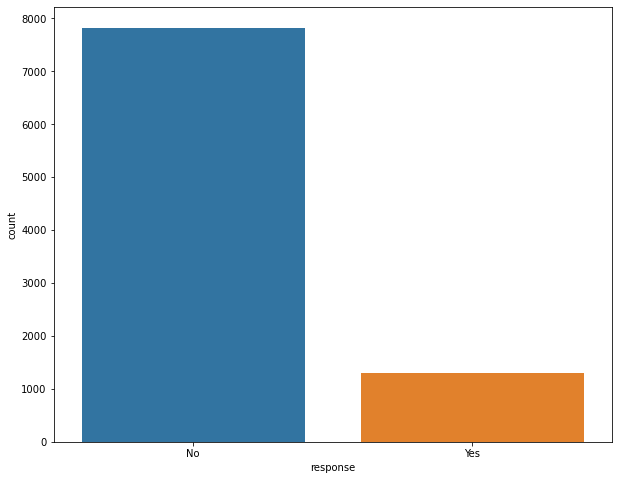

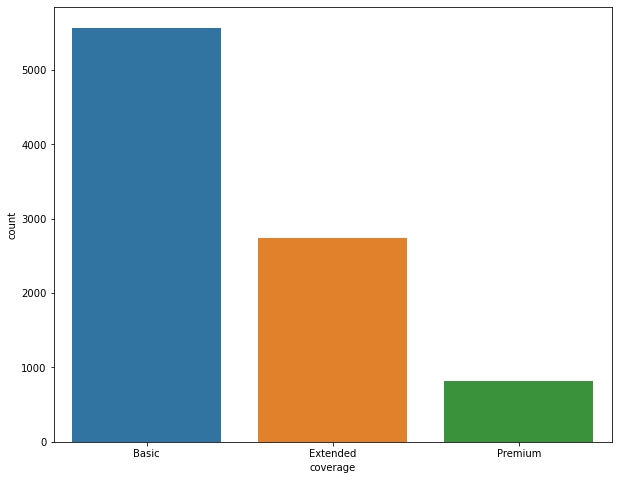

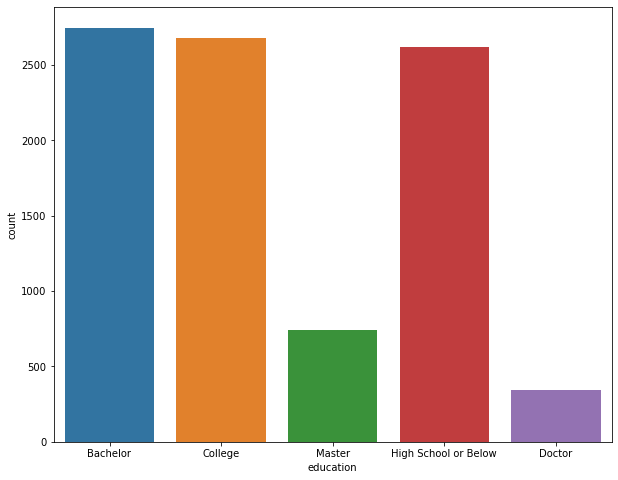

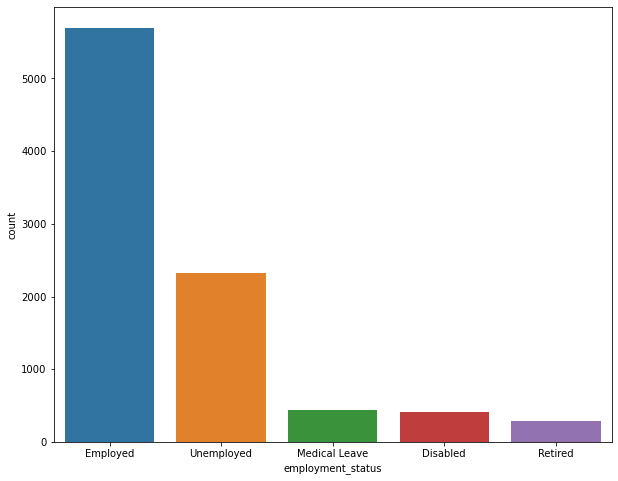

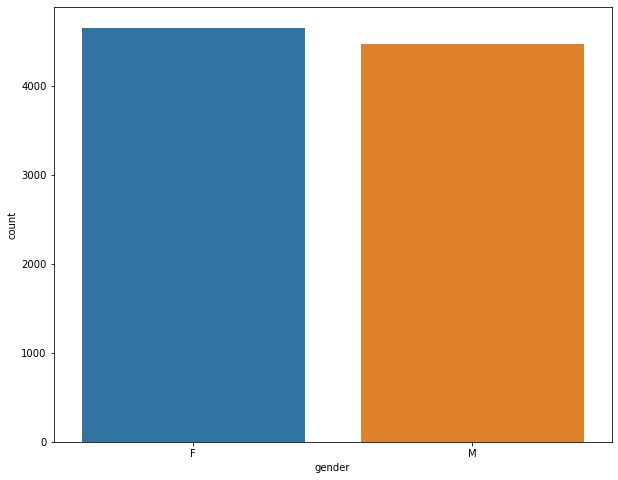

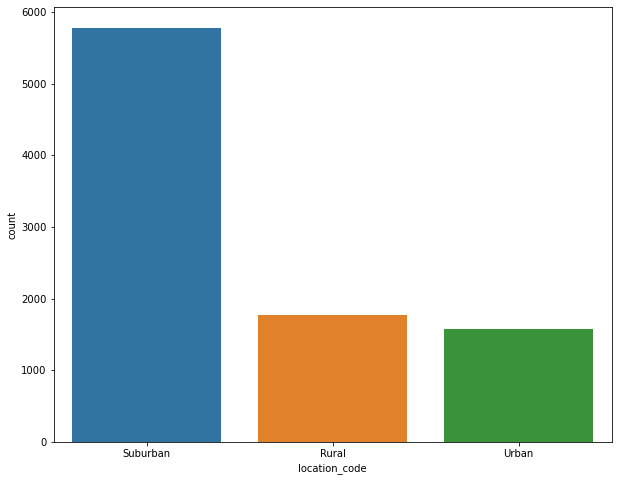

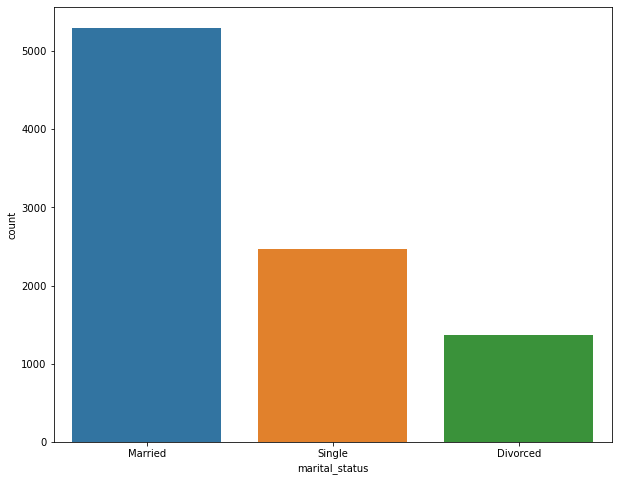

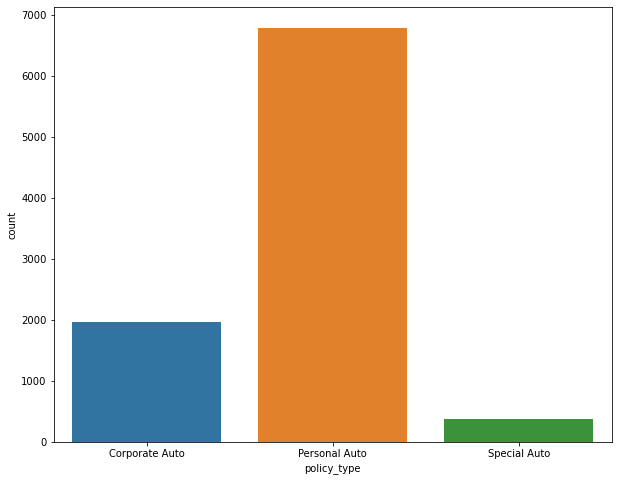

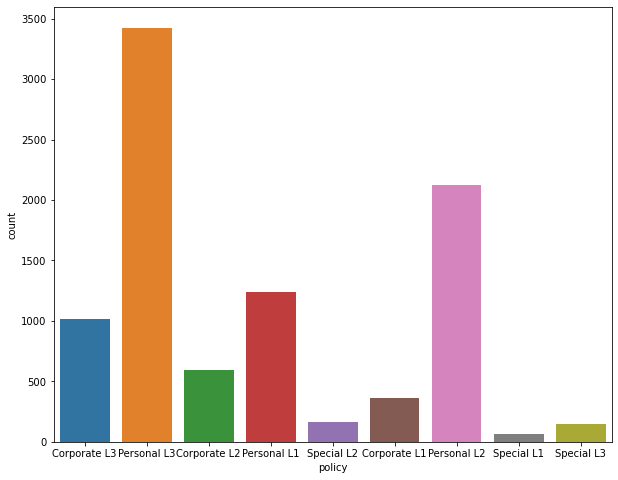

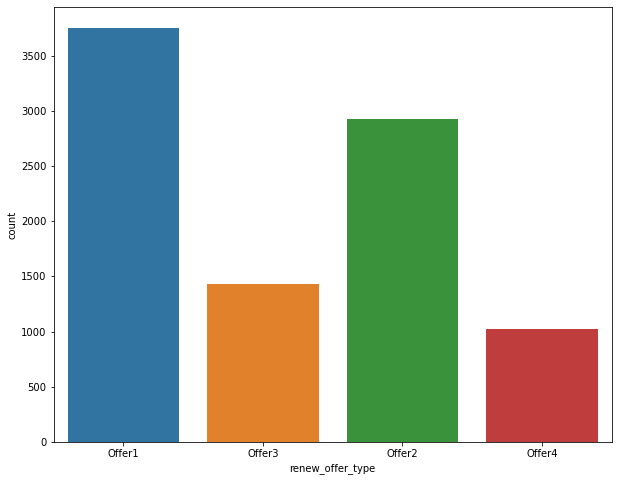

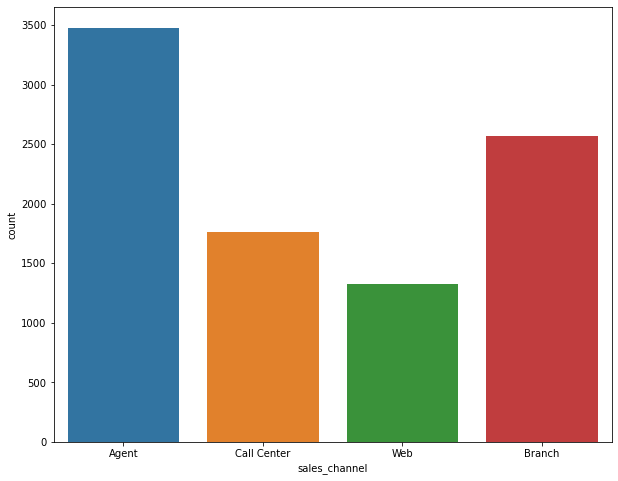

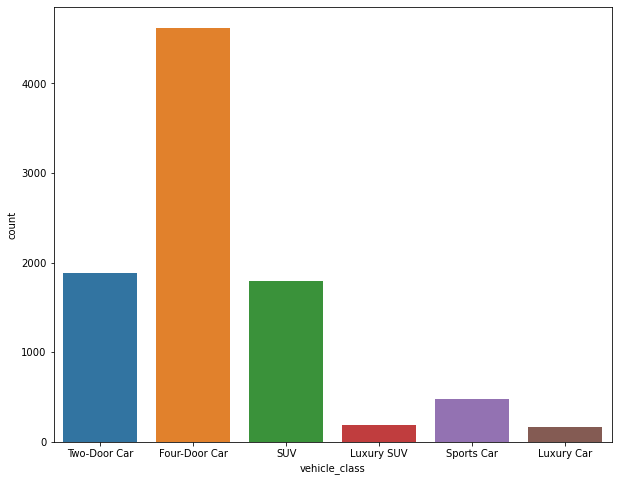

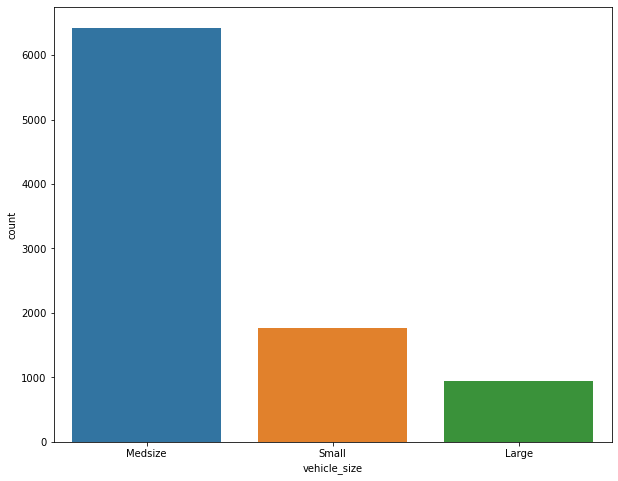

In [25]:
for col in customer_df.select_dtypes('object'):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.countplot(customer_df[col])
    plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [108]:
for col in customer_df:
    print(customer_df[col].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-01-28    169
2011-02-26    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161

4. Plot time variable. Can you extract something from it?

In [26]:
len(customer_df['effective_to_date'].value_counts())

59

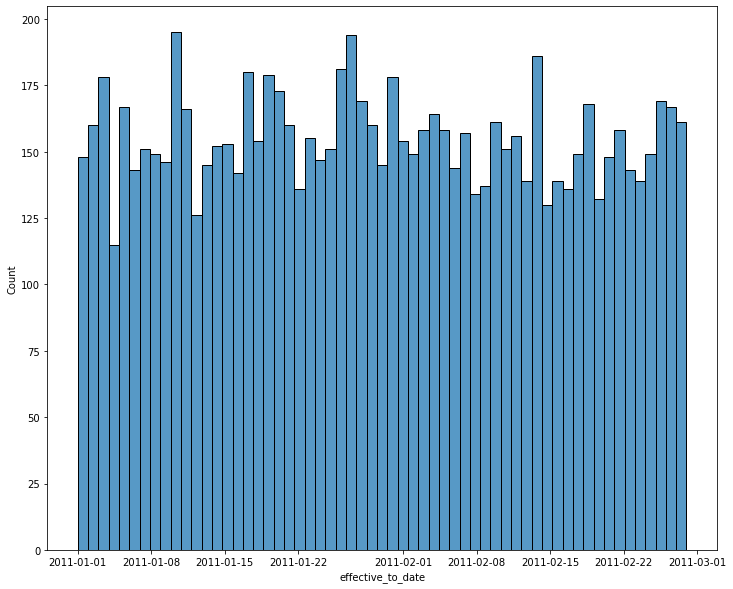

In [110]:
plt.subplots(figsize=(12, 10))
sns.histplot(customer_df['effective_to_date'], bins = len(customer_df['effective_to_date'].value_counts()))
plt.show()